# multi-layer LSTM recurrent neural network

Created on Tue Nov 24 20:17:15 2020
LSTM stands for long short term memory.


It is a model or architecture that extends the memory of recurrent neural
networks. Typically, recurrent neural networks have ‘short term memory’ in
that they use persistent previous information to be used in the current neural
network.

From: https://medium.com/ai-in-plain-english/time-series-forecasting-predicting-stock-prices-using-an-lstm-model-30d6f1ca2640
Tesla stock price data from: https://finance.yahoo.com/quote/GOOG/history?period1=1433548800&period2=1591833600&interval=1d&filter=history&frequency=1d
keras & tensor flow would not install in conda base, so installed in py37 instead.
Python 3’s f-Strings: An Improved String Formatting Syntax. https://realpython.com/python-f-strings/
Also: https://realpython.com/python-timer/  (didn't use here, but it's nice.)


load the data and inspect them

In [1]:
# import math
import matplotlib
import matplotlib.pyplot as plt
# import keras  # deep learning lib for theano and tensorflow
import pandas as pd
import numpy as np
# import os
import sys
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.layers import *
import sklearn
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split
# from keras.callbacks import EarlyStopping


pver = str(format(sys.version_info.major) + '.' +
           format(sys.version_info.minor) + '.' +
           format(sys.version_info.micro))
print('Python version: {}'.format(pver))
print('SciKitLearn:    {}'.format(sklearn.__version__))
print('matplotlib:     {}'.format(matplotlib.__version__))

starttime = time.perf_counter()
df = pd.read_csv("..\\data\\TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Using TensorFlow backend.
C:\Users\steve\anaconda3\envs\Python37a\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steve\anaconda3\envs\Python37a\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steve\anaconda3\envs\Python37a\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steve\anaconda3\envs\Pytho

Python version: 3.7.8
SciKitLearn:    0.23.1
matplotlib:     3.3.0
Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model. To learn more about overfitting read this article:
Is your model overfitting? Or maybe underfitting? An example using a neural network in python
Overfitting, underfitting, generalization ability, cross-validation. Everything simply explained. I also provide a…
towardsdatascience.com
The target value to be predicted is going to be the “Close” stock price value.

In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

It’s a good idea to normalize the data before model fitting. This will boost the performance. You can read more here for the Min-Max Scaler.
Let’s build the input features with time lag of 1 day (lag 1):

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

We have now reshaped the data into the following format (#values, #time-steps, #1 dimensional output).
Now, it’s time to build the model. We will build the LSTM with 50 neurons and 4 hidden layers. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.
Note: the following will take some time (~5min).

In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0760
Epoch 2/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0173
Epoch 3/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0145
Epoch 4/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0122
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0127
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0147
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0123
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 9/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 11/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 12/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 13/100

Prepare the test data (reshape them):

In [6]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


Make Predictions using the test set

In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Let’s visualize the results now:

# 5. Results

Using a lag of 1 (i.e. step of one day):

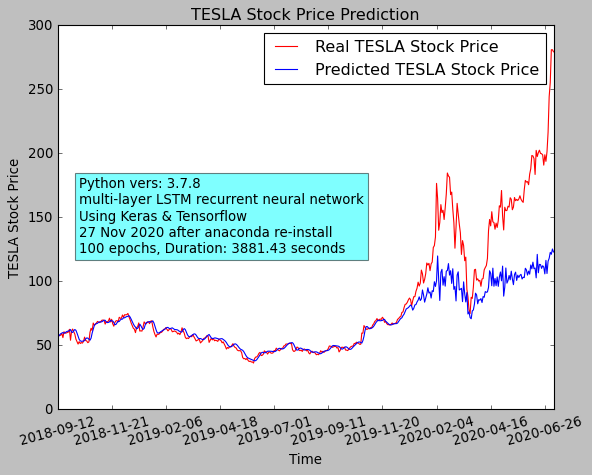

In [8]:
endtime = time.perf_counter()
duration = endtime - starttime

plt.style.use('classic')
# Visualising the results
plt.plot(df.loc[800:, 'Date'], dataset_test.values, color='red',
         label='Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price, color='blue',
         label='Predicted TESLA Stock Price')
plt.xticks(np.arange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.xticks(rotation=15)
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.text(20, 120,# transform=trans1,
         s='Python vers: 3.7.8\nmulti-layer LSTM recurrent neural network' + 
         '\nUsing Keras & Tensorflow\n27 Nov 2020 after anaconda re-install' +
         f'\n100 epochs, Duration: {duration:3.2f} seconds',
         wrap=True, ha='left', va='bottom',
         fontsize=12, bbox=dict(facecolor='aqua', alpha=0.5))

plt.show()

## Observation: Huge drop in March 2020 due to the COVID-19 lockdown !

#### We can clearly see that our model performed very good. It is able to accuretly follow most of the unexcepted jumps/drops however, for the most recent date stamps, we can see that the model expected (predicted) lower values compared to the real values of the stock price.